<img src="img/decisionmaking.png" width="400">

# ELEC-E7851 - Computational User Interface Design
# Lecture 10 - Modeling decision making

**Aurélien Nioche**

Aalto University

## Preamble

<img src="img/netflix.png" width="900">

<img src="img/diagram.jpeg" width="1000">

<div class="alert alert-block alert-success">
<h2><img src="img/goal.png" width="20" align="left">&nbsp;Learning objectives</h2>
    <br>Learn by a basic example the elementary rules of decision making modeling, including:
    <ul>
        <li>How to design task and models (see <a href="#1.-Task-Model-&-Decision-Making-Models" class="alert-link">Section 1</a>);
        <li>How to conduct exploratory simulations and  (see <a href="#2.-Exploratory-Simulations" class="alert-link">Section 2</a>);
        <li>How to fit your models on experimental data and be confident that you can recover the best parameters (see <a href="#3.-Parameter-Fitting-&amp;-Parameter-Recovery" class="alert-link">Section 3</a>);
        <li>How to compare the quality of your models given data and be confident that you can recover the best model (see <a href="#4.-Model-Comparison-&amp;-Model-Recovery" class="alert-link">Section 4</a>);
        <li>How to simulate your experimental results in preparation of a 'real' experiment (see <a href="#5.-Artificial-Experiment" class="alert-link">Section 5</a>);
    </ul>
</div>

## Course Overview

<h3><img src="img/design.png" width="30" align="left">&nbsp;&nbsp;&nbsp;&nbsp;<a href="#1.-Task-Model-&-Decision-Making-Models">1. Task Model &amp; Decision Making Models</a></h3>

<a href="#1.1-Task-definition">1.1 Task definition</a>

<a href="#1.2-Models-definition">1.2 Models definition</a>


<h3><img src="img/simulation.jpg" width="50" align="left">&nbsp;<a href="#2.-Exploratory-Simulations">2. Exploratory Simulations</a></h3>

<a href="#2.1-Simulate-a-single-agent">2.1 Simulate a single agent</a>

<a href="#2.2-Analyse-latent-variables">2.2 Analyse latent variables</a>

<a href="#2.3-Simulate-a-population-of-homogeneous-agents">2.3 Simulate a population of homogeneous agents</a>

<a href="#2.4-Represent-the-effect-of-the-free-parameters-on-behavior">2.4 Represent the effect of the free parameters on behavior</a>

<h3><img src="img/optimization.jpeg" width="50" align="left">&nbsp;<a href="#3.-Parameter-Fitting-&amp;-Parameter-Recovery">3. Parameter Fitting &amp; Parameter Recovery</a></h3>

<a href="#3.1-Define-a-likelihood-function">3.1 Define a likelihood function</a>

<a href="#3.2-Choose-a-way-to-search-for-the-best-parameters">3.2 Choose a way to search for the best parameters</a>

<a href="#3.3-Try-with-a-single-agent">3.3 Try with a single agent</a>

<a href="#3.4-Explore-the-behavior-of-the-likelihood-function-over-the-parameter-space">3.4 Explore the behavior of the likelihood function over parameter space</a>

<a href="#3.5-Try-with-a-homogeneous-population">3.5 Try with a homogeneous population</a>

<a href="#3.6-Systematize-the-process">3.6 Systematize the process</a>

<h3><img src="img/competition.png" width="50" align="left">&nbsp;<a href="#4.-Model-Comparison-&amp;-Model-Recovery">4. Model Comparison &amp; Model Recovery</a></h3>

<a href="#4.1-Choose-a-metric">4.1 Choose a metric</a>
    
<a href="#4.2-Try-with-a-single-agent">4.2 Try with a single agent</a>

<a href="#4.3-Systematize-the-approach">4.3 Systematize the approach</a>

<h3><img src="img/experiment.jpg" width="30" align="left">&nbsp;&nbsp;&nbsp;&nbsp;<a href="#5.-Artificial-Experiment">5. Artificial Experiment</a></h3>

<a href="#5.1-Generate-data">5.1 Generate data</a>

<a href="#5.2-Compare-the-models">5.2 Compare the models</a>

<a href="#5.3-Study-the-distribution-of-your-best-fit-parameters">5.3 Study the distribution of your best-fit parameters</a>

<a href="#5.4-Simulate-with-the-best-fit-parameters">5.4 Simulate with the best-fit parameters</a>

<a href="#Conclusive-Remarks-and-a-Few-Take-Aways">Conclusive Remarks and a Few Take Aways</a>

<a href="#Additional-material">Additional material</a>


---
### Note

This lecture is greatly inspired by <a href="https://www.ocf.berkeley.edu/~acollins/pdfs/papers/WilsonCollins_modelFitting.pdf" >Wilson &amp; Collins (2019) </a>.

## 1. Task Model & Decision Making Models
<a href="#Course-Overview">Course Overview</a>

<img src="img/design.png" width="300">

<div class="alert alert-block alert-success">
<h3><img src="img/goal.png" width="20" align="left">&nbsp;Section Goal</h3>
<ul>
    <li>Design the task that will allow you to answer your research question;
    <li> Design the decision making models that you want to put in competition.
    </ul>
</div>

### 1.1 Task definition
<a href="#Course-Overview">Course Overview</a>

<div class="alert alert-block alert-info">
<h4><img src="img/goal.png" width="20" align="left">&nbsp;Goal</h4>
    <ul>
        <li>Define a task that allow you to answer your research question;
        <li>Select adequate characteristics (i.e., enough time-steps).
    </ul>
</div>

<img src="img/how_to.png" width="25" align="left">&nbsp;**How to do it?**

Let's take as example:

<img src="img/illustration.jpeg" width="700">

**Question**: "How do people learn the probabilities of rewards given a pool of options?"

<b>Task: <a href="https://en.wikipedia.org/wiki/Multi-armed_bandit">Bandit task</a></b>

<img src="img/multiarmedbandit.jpg" width="200">

Parameters: 
* Number of option ($N$)
* Distribution of probability over these options ($\{p_{reward}(i)\}_{i\in N}$)
* Number of trials ($T$)


*Note: In lecture 7, you studied how to solve the bandit problem programmatically aiming for the most optimal result. In this class, we don't aim for optimality but seek to understand how humans solve this type of problem.*

In [1]:
import numpy as np
import scipy.optimize
import scipy.stats
from itertools import product
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sys
import statsmodels.stats
import statsmodels.stats.proportion
from IPython.display import display

In [2]:
N = 2
P = np.array([0.5, 0.75])
T = 500

### 1.2 Models definition
<a href="#Course-Overview">Course Overview</a>

<div class="alert alert-block alert-info">
<h4><img src="img/goal.png" width="20" align="left">&nbsp;Goal</h4>
    <ul>
        <li>Model alternative hypotheses regarding the underlying decision making process.
    </ul>
</div>

<img src="img/how_to.png" width="20" align="left">&nbsp;<b>How to do it?</b>

Here, we will consider that each agent has the opportunity at each $t\in T$ to:
<ul>
    <li>Choose: we will define for each model a "decision rule", more precisely, we model a probability distribution over the action choices such as:
\begin{equation}
\forall i: p_{choice}(i) \in [0, 1] \wedge \sum_{i}^N p_{choice}(i) = 1
\end{equation}
</ul>
<ul>
    <li>Learn: we will define for each model an "updating rule".
</ul>

In [3]:
class GenericPlayer:
    
    """
    Generic Player
    """
    
    param_labels = ()
    fit_bounds = ()

    def __init__(self):
        self.options = np.arange(N)

    def choose(self):
        p = self.decision_rule()
        return np.random.choice(self.options, p=p)

    def learn(self, option, success):
        self.updating_rule(option=option, success=success)

    def decision_rule(self):
        raise NotImplementedError

    def updating_rule(self, option, success):
        pass

On this basis, we can define all of our models. Let's begin as simple as possible:


**M1. Random selection**

<img src="img/coin.png" width="200">

* Decision rule:

\begin{equation}
p_{choice}(i) = 1/N
\end{equation}

In [4]:
class Random(GenericPlayer):
    
    """
    Random selection
    """

    def __init__(self):
        super().__init__()

    def decision_rule(self):
        return np.ones(N) / N

<b>M2. <a href="https://en.wikipedia.org/wiki/Win%E2%80%93stay,_lose%E2%80%93switch">Win-Stay-Lose-Switch</a> (Noisy variant)</b>

<img src="img/wsls.png" width="200">

<ul>
    <li>Decision rule ($\epsilon$)
<ul>
\begin{equation}
p_{choice}(i) = 
\begin{cases}
1−\epsilon+\epsilon / N &\text{if } r_{t−1} = 1 \wedge c_{t−1} = i,\\
\dfrac{1−\epsilon}{N-1} + \epsilon / N & \text{if } r_{t−1} = 0 \wedge c_{t−1} \neq i\\
\epsilon / N & \text{otherwise.}\\
\end{cases}
\end{equation}

where $\epsilon \in [0, 1]$ is a free parameter describing the probability to choose randomly instead of applying the "Win-Stay-Lose-Switch' rule.

In [5]:
class WSLS(GenericPlayer):
    """
    Win-Stay-Lose-Switch
    """

    param_labels = "epsilon",
    fit_bounds = (0., 1),

    def __init__(self, epsilon):
        super().__init__()
        self.epsilon = epsilon

        self.c = -1
        self.r = -1

    def decision_rule(self):

        if self.c == -1:
            return np.ones(N) / N  # First turn

        p = np.zeros(N)

        p_apply_rule = 1 - self.epsilon # 1 - epsilon: apply the rule
        p_random = self.epsilon / N # epsilon: pick up randomly
        if self.r:
            p[self.options != self.c] = p_random
            p[self.c] = 1 - np.sum(p)  # p_apply_rule + p_random
        else:
            p[self.options != self.c] = p_apply_rule / (N - 1) + p_random
            p[self.c] = 1 - np.sum(p)  # p_random

        return p

    def updating_rule(self, option, success):
        self.r = success
        self.c = option

<b>M3. <a href="https://en.wikipedia.org/wiki/Rescorla%E2%80%93Wagner_model">Rescorla-Wagner</a></b>

<img src="img/rl_illustration.jpeg" width=400>

<ul>
    <li>Updating rule ($\alpha$)
</ul>

\begin{equation}
Q^{t+1}(i) = Q^t(i) + \alpha(s - Q^t(i))
\end{equation}

where:

<ul>
    <li> $s=1$ in case of success, 0 otherwise;
    <li> $\alpha \in [0, 1]$ is a free parameter describing to which extent a new success/failure will impact the $Q$-values.
</ul>

<img src="img/learning_curve.png" width="200">


---

<img src="img/exploration_vs_exploitation.png" width="300">

<ul>
    <li>Decision rule ($\beta$)
</ul>

\begin{equation}
p_{choice}(i) = \dfrac{\exp (\beta Q(i))}{\sum_{j \in N} \exp (\beta Q(j))} 
\end{equation}

where $\beta \in [0, \infty]$ is a free parameter describing the stochasticity of the choice: the greater $\beta$ is, the more the $Q$-values will impact the probability distribution.

<img src="img/sigmoid.png" width="200">

In [6]:
class RW(GenericPlayer):
    """
    Rescorla-Wagner
    """

    param_labels = r"$\alpha$", r"$\beta$",
    fit_bounds = (0.0, 1.0), (1.0, 20.0),

    def __init__(self, q_alpha, q_beta, initial_value=0.5):
        super().__init__()
        self.q_values = np.full(N, initial_value)
        self.q_alpha = q_alpha
        self.q_beta = q_beta

    def decision_rule(self):
        p_soft = np.exp(self.q_beta * self.q_values) / \
                 np.sum(np.exp(self.q_beta * self.q_values))
        return p_soft

    def updating_rule(self, option, success):
        self.q_values[option] += \
            self.q_alpha * (success - self.q_values[option])

<img src="img/status_quo.jpg" width=400>

**M4. Rescorla-Wagner-Choice-Kernel**

<ul>
    <li>Updating rule ($\alpha_q$, $\alpha_c$)
</ul>

\begin{align}
Q^{t+1}(i) &= Q^t(i) + \alpha_q(s - Q^t(i)) \\
C^{t+1}(i) &= C^t(i) + \alpha_c(a^t(i) - C^t(i)) \\
\end{align}

where:

<ul><ul>
    <li> $s=1$ in case of success, 0 otherwise;
    <li> $a^t(i) = 1$ if option $i$ selected at time $t$ else 0; 
    <li> $\alpha_q \in [0, 1]$ is a free parameter describing to which extent a new success/failure will impact the $Q$-values;
   <li> $\alpha_c \in [0, 1]$ is a free parameter describing to which extent the action selected at $t$ will impact the $C$-values.
            </ul></ul>
<br>

<ul>
    <li>Decision rule ($\beta_q$, $\beta_c$)
</ul>
        
\begin{equation}
p_{choice}(i) = \dfrac{\exp (\beta_q Q(i)+ \beta_c C(i))}{\sum_{j \in N} 
\exp (\beta_q Q(j)+ \beta_c C(j))} 
\end{equation}

where:
    
<ul><ul>
    <li> $\beta_q \in [0, \infty]$ is a free parameter describing the stochasticity of the choice: the greater $\beta_q$ is, the more the $Q$-values will impact the probability distribution;
    <li> $\beta_c \in [0, \infty]$ is a free parameter describing the 'choice stickiness': the greater $\beta_c$ is, the more the $C$-values will impact the probability distribution.</li>
    </ul></ul>
<br>
<br>

*Note: The implementation follows the description given by <a href="https://www.ocf.berkeley.edu/~acollins/pdfs/papers/WilsonCollins_modelFitting.pdf" >Wilson & Collins (2019) </a>.*

In [7]:
class RWCK(RW):

    """
    Rescorla-Wagner-Choice-Kernel
    """

    param_labels = ("alpha_q", "beta_q", "alpha_c", "beta_c")
    fit_bounds = (0.0, 1), (1.0, 20.0), (0.0, 1), (1.0, 20.0)

    def __init__(self,  q_alpha, q_beta, c_alpha, c_beta):

        super().__init__(q_alpha=q_alpha, q_beta=q_beta)
        self.c_alpha = c_alpha
        self.c_beta = c_beta
        self.c_values = np.zeros(N)

    def decision_rule(self):

        p_soft = np.exp(
            (self.q_beta * self.q_values) +
            (self.c_beta * self.c_values)
        ) / \
             np.sum(np.exp(
                 (self.q_beta * self.q_values) +
                 (self.c_beta * self.c_values)
             ))
        return p_soft

    def updating_rule(self, option, success):

        a = np.zeros(N, dtype=int)
        a[option] = 1

        self.c_values[:] += \
            self.c_alpha * (a - self.c_values[:])

        super().updating_rule(option=option, success=success)

## 2. Exploratory Simulations
<a href="#Course-Overview">Course Overview</a>

<img src="img/simulation.jpg" width="300">

<div class="alert alert-block alert-danger">
<h3><img src="img/warning.png" width="20" align="left">&nbsp;Warning</h3>
    <br>We will describe the procedure only for Rescorla-Wagner, but it should done for <b>all</b> the models in competition.</div>
    
<div class="alert alert-block alert-success">
<h3><img src="img/goal.png" width="20" align="left">&nbsp;Section Goal</h3>
<ul>
    <li>'Play' with your models;
    <li> Be sure that you obtain (at least under some conditions) what you want to model;
    <li> Have a general overview of what your results could look like.
    </ul>
</div>

### 2.1 Simulate a single agent
<a href="#Course-Overview">Course Overview</a>

<div class="alert alert-block alert-info">
<h4><img src="img/goal.png" width="20" align="left">&nbsp;Goal</h4>
    <ul>
        <li>Have a first insight into your model's behavior.
    </ul>
</div>

<img src="img/how_to.png" width="20" align="left">&nbsp;<b>How to do it?</b>

In [12]:
def run_simulation(seed, agent_model, param=()):

    # Seed the pseudo-random number generator
    np.random.seed(seed)

    # Create the agent
    agent = agent_model(*param)

    # Data containers
    choices = np.zeros(T, dtype=int)
    successes = np.zeros(T, dtype=bool)

    # Simulate the task
    for t in range(T):

        # Determine choice
        choice = agent.choose()

        # Determine success
        p_success = P[choice]
        success = np.random.choice(
            [0, 1],
            p=np.array([1 - p_success, p_success]))

        # Make agent learn
        agent.learn(option=choice, success=success)

        # Backup
        choices[t] = choice
        successes[t] = success

    return pd.DataFrame({
        "time": np.arange(T),
        "choice": choices, 
        "success": successes})


# We will experiment with Rescola-Wagner
MODEL_XP = RW

# Get data
param_single = np.array([0.10, 10.00])
bhv_single = run_simulation(agent_model=MODEL_XP, param=param_single, seed=0)

# Print...
display(bhv_single)

,time,choice,success
0,0,1,True
1,1,1,True
2,2,1,True
3,3,1,True
4,4,1,True
...,...,...,...
495,495,0,False
496,496,1,True
497,497,1,False
498,498,1,True


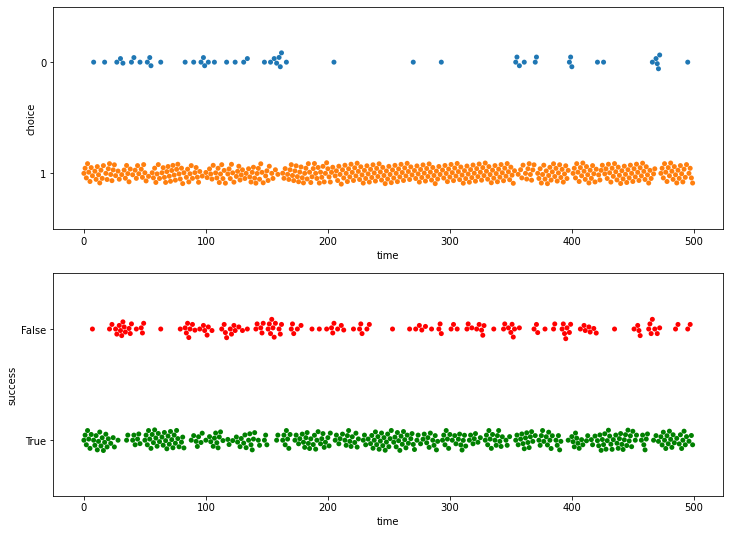

In [13]:
# Create figure and axes
fig, axes = plt.subplots(nrows=2, figsize=(12, 9))

# Show choices
sns.swarmplot(data=bhv_single, x='time', y='choice', ax=axes[0], orient="h")

# Show success
sns.swarmplot(data=bhv_single, x='time', y='success',
              ax=axes[1], palette={True: "green", False: "red"}, orient="h")

plt.show()

### 2.2 Analyse latent variables
<a href="#Course-Overview">Course Overview</a>

<div class="alert alert-block alert-info">
<h4><img src="img/goal.png" width="20" align="left">&nbsp;Goal</h4>
    <ul>
        <li>Observe the dynamics of your model.
    </ul>
</div>

<img src="img/how_to.png" width="20" align="left">&nbsp;<b>How to do it?</b>

In [14]:
def latent_variables_rw(bhv_data, param):

    """
    Specific to RW
    """

    # Create the agent
    agent = RW(*param)

    # Data container
    row_list = []

    # (Re-)Simulate the task
    for t in range(T):
        
        # Get the q-values and probabilites of each choice
        q_values = agent.q_values
        p_choices = agent.decision_rule()
        
        # For each option...
        for i in range(N):
            row_list.append({
                "time": t,
                "option": i,
                "q": q_values[i],
                "p": p_choices[i]})

        # Make agent learn
        agent.learn(option=bhv_data.choice[t],
                    success=bhv_data.success[t])

    return pd.DataFrame(row_list)


# Get the data
lv_single = latent_variables_rw(bhv_data=bhv_single, param=param_single)

# Print...
display(lv_single)

,time,option,q,p
0,0,0,0.500000,0.500000
1,0,1,0.500000,0.500000
2,1,0,0.500000,0.377541
3,1,1,0.550000,0.622459
4,2,0,0.500000,0.278885
...,...,...,...,...
995,497,1,0.883936,0.987591
996,498,0,0.446255,0.029515
997,498,1,0.795543,0.970485
998,499,0,0.446255,0.024190


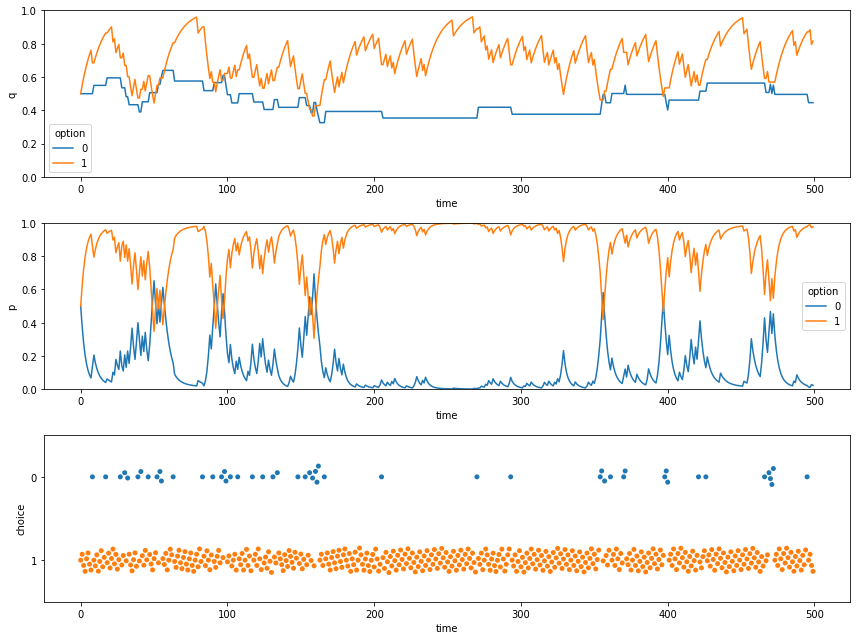

In [15]:
# Plot
fig, axes = plt.subplots(nrows=3, figsize=(12, 9))

# Show the q-values
sns.lineplot(data=lv_single, x="time", y="q", hue="option", ax=axes[0])

# Show the probabilities of choice
sns.lineplot(data=lv_single, x="time", y="p", hue="option", ax=axes[1])

# Set the limits of the y-axis
for ax in axes[:2]:
    ax.set_ylim(0, 1)

# Show the choices
sns.swarmplot(data=bhv_single, x='time', y='choice', orient="h", ax=axes[2])

plt.tight_layout()
plt.show()

### 2.3 Simulate a population of homogeneous agents
<a href="#Course-Overview">Course Overview</a>

<div class="alert alert-block alert-info">
<h4><img src="img/goal.png" width="20" align="left">&nbsp;Goal</h4>
    <ul>
        <li>Evaluate the 'noise' of your behavior by using constant parametrisation;
        <li>Get a picture of your expected behavior under the best scenario 
(you find the best model, and subjects share the same best parameters).
    </ul>
</div>

<img src="img/how_to.png" width="20" align="left">&nbsp;<b>How to do it?</b>

- Maintain constant the parameters that you are using (except the seed of your pseudo-random number generator)

In [16]:
def run_sim_pop(model, param, n_subjects, seed):

    print(f"Running simulation for {n_subjects} agents...")

    # Data container (will contain one dataframe for each subject)
    frames = []

    for i in tqdm(range(n_subjects), file=sys.stdout):

        # Get choices and successes
        single_d = run_simulation(seed=seed[i], agent_model=model, param=param[i])
        
        # Add a 'id' column to identify each subject
        single_d["id"] = seed[i]
        
        # Backup
        frames.append(single_d)
    
    # Return a unique dataframe
    return pd.concat(frames)


def latent_variables_rw_pop(bhv_data_pop, param):

    """
    Specific to RW
    """
    
    # Get one dataframe per subject
    frames_bhv = [x for _, x in bhv_data_pop.groupby("id")]

    # Data containers
    frames = []
    
    # For each subject's dataframe...
    for bhv_data, pr in zip(frames_bhv, param):

        # Get q-values and choice probabilities
        single_d = latent_variables_rw(bhv_data, param=pr)
        
        # Add a 'id' column to identify each subject
        single_d["id"] = bhv_data["id"][0]
        
        # Backup
        frames.append(single_d)
    
    # Return a unique dataframe
    return pd.concat(frames)

In [17]:
# Set the number of subjects
N_SUBJECTS = 30

# Set the parameters
param_hom_pop = [param_single for _ in range(N_SUBJECTS)]

# Get the behavioral data
bhv_hom_pop = run_sim_pop(model=MODEL_XP, 
                          param=param_hom_pop, 
                          n_subjects=N_SUBJECTS,
                          seed=np.arange(N_SUBJECTS))

# Print...
display(bhv_hom_pop)

Running simulation for 30 agents...
100%|██████████| 30/30 [00:01<00:00, 21.21it/s]


,time,choice,success,id
0,0,1,True,0
1,1,1,True,0
2,2,1,True,0
3,3,1,True,0
4,4,1,True,0
...,...,...,...,...
495,495,1,False,29
496,496,1,True,29
497,497,1,True,29
498,498,1,True,29


In [19]:
# Get the latent variable
lv_hom_pop = latent_variables_rw_pop(bhv_hom_pop, param=param_hom_pop)

# Print...
display(lv_hom_pop)

,time,option,q,p,id
0,0,0,0.500000,0.500000,0
1,0,1,0.500000,0.500000,0
2,1,0,0.500000,0.377541,0
3,1,1,0.550000,0.622459,0
4,2,0,0.500000,0.278885,0
...,...,...,...,...,...
995,497,1,0.662010,0.938785,29
996,498,0,0.388991,0.044439,29
997,498,1,0.695809,0.955561,29
998,499,0,0.388991,0.033170,29


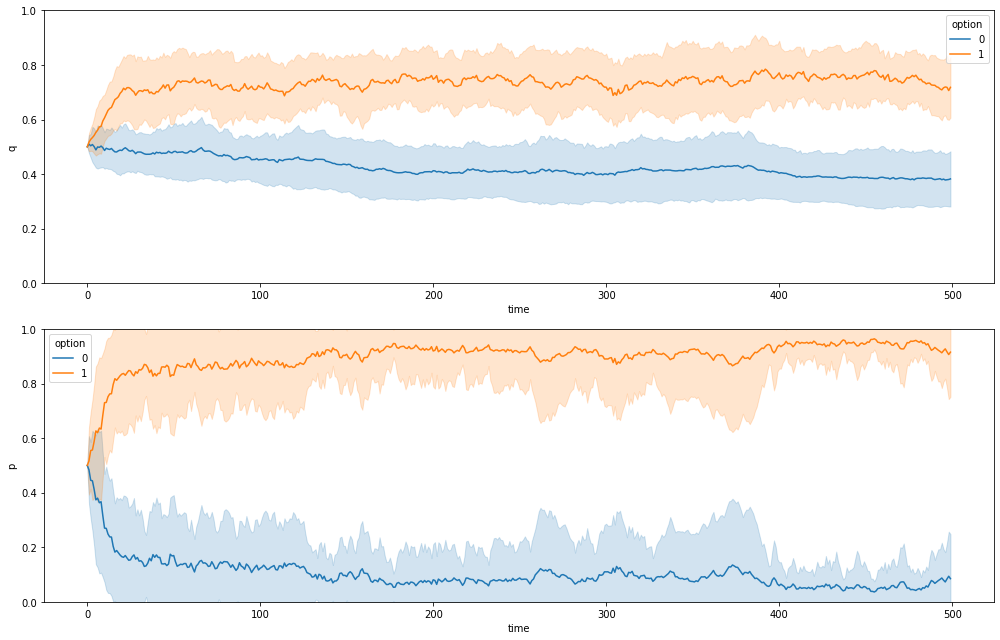

In [20]:
# Plot
fig, axes = plt.subplots(nrows=2, figsize=(14, 9))

# Plot the q-values
sns.lineplot(data=lv_hom_pop, x="time", y="q", hue="option", ax=axes[0], ci="sd")

# Plot the p-values
sns.lineplot(data=lv_hom_pop, x="time", y="p", hue="option", ax=axes[1], ci="sd")

# Set the limits of the y-axis 
for ax in axes[:2]:
    ax.set_ylim(0, 1)

plt.tight_layout()
plt.show()

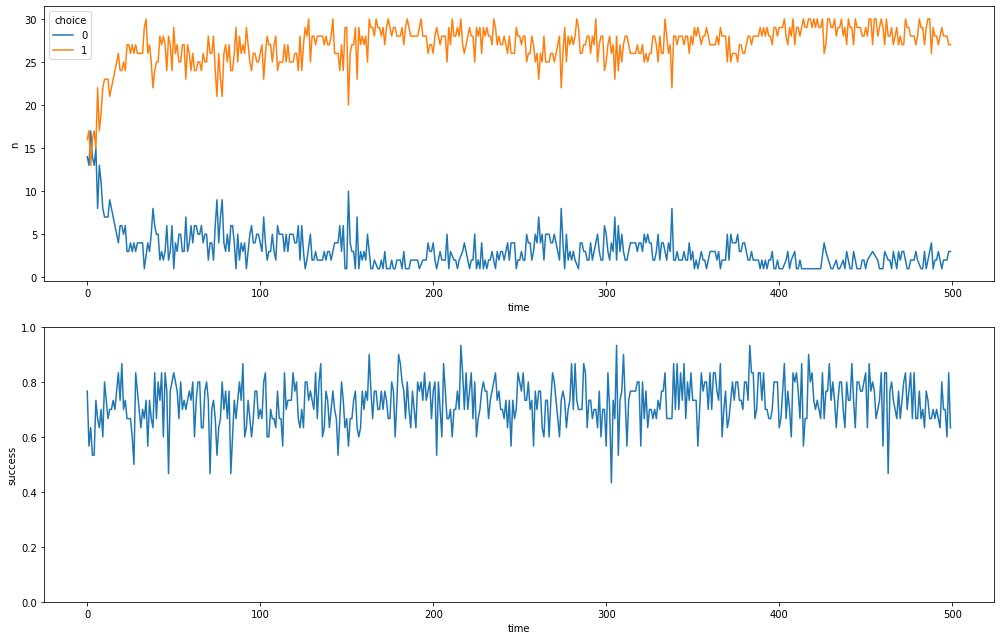

In [22]:
# Plot
fig, axes = plt.subplots(nrows=2, figsize=(14, 9))

# Plot the choices
rep_choice = bhv_hom_pop.groupby(['time', 'choice']).size().to_frame('n').reset_index()
sns.lineplot(data=rep_choice, x="time", y="n", hue="choice", ax=axes[0])

# Plot the successes
sns.lineplot(data=bhv_hom_pop, x="time", y="success", ax=axes[1], ci=None)

# Set the limits of the y-axis
axes[1].set_ylim(0, 1)

plt.tight_layout()
plt.show()

### 2.4 Represent the effect of the free parameters on behavior
<a href="#Course-Overview">Course Overview</a>

<div class="alert alert-block alert-info">
<h4><img src="img/goal.png" width="20" align="left">&nbsp;Goal</h4>
    <ul>
        <li>Isolate the effect of each parameter.
    </ul>
</div>

<img src="img/how_to.png" width="20" align="left">&nbsp;<b>How to do it?</b>

In our case, we can:
* Represent the q-values over time for different learning rates ($\alpha$)

In [33]:
# Set the number of iteration
n_iteration=100

# Define a set of values to test
alpha_list = (0.01, 0.1, 0.2, 0.3)

# Results container
row_list = []

# For each alpha-value in the list...
for alpha in alpha_list:
    
    agent = RW(q_alpha=alpha, q_beta=None)
    
    for t in range(n_iteration):

        q0 = agent.q_values[0]
        
        row_list.append({
            r"$\alpha$": alpha,
            "time": t,
            "q": q0
        })
        
        agent.learn(option=0, success=1)

# Create a dataframe
df_alpha = pd.DataFrame(row_list)

# Print...
display(df_alpha)

,$\alpha$,time,q
0,0.01,0,0.500000
1,0.01,1,0.505000
2,0.01,2,0.509950
3,0.01,3,0.514850
4,0.01,4,0.519702
...,...,...,...
395,0.30,95,1.000000
396,0.30,96,1.000000
397,0.30,97,1.000000
398,0.30,98,1.000000


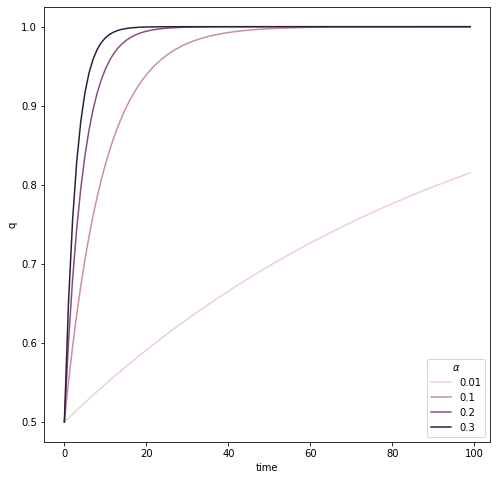

In [34]:
# Create the figure and axis
fig, ax = plt.subplots(figsize=(8, 8))

# Plot one line for each alpha-value
sns.lineplot(data=df_alpha, x="time", y="q", hue=r"$\alpha$")

plt.show()

 ---

 * Represent the probability of choice for an option against another depending on the difference of value, for $\beta$-values

In [113]:
param_values = (1.0, 5.0, 10.0, 20.0)
min_reward=0
max_reward=1

max_diff = max_reward - min_reward
x_values = np.linspace(-max_diff, max_diff, 100)

n_x_values = len(x_values)
n_param_values = len(param_values)

y_values = np.zeros((len(x_values), n_param_values))

for i in range(n_param_values):
    for j in range(n_x_values):
        x = x_values[j]
        beta = param_values[i]
        y_values[j, i] = 1 / (1 + np.exp(-beta*x))


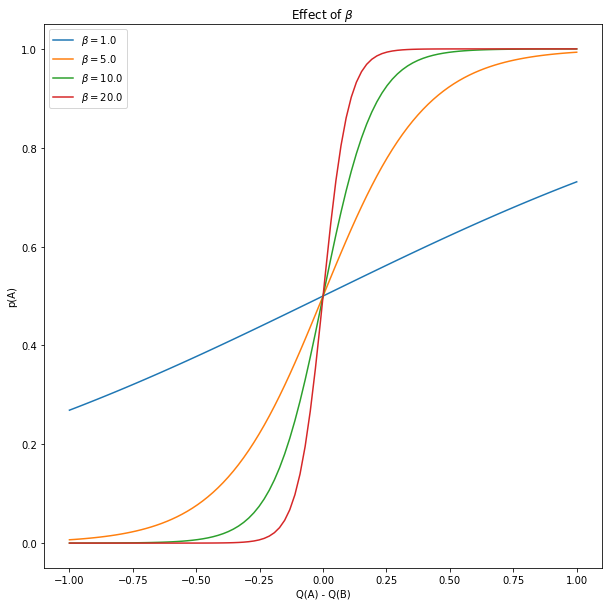

In [114]:
# Plot
fig, ax = plt.subplots(figsize=(10, 10))
lines = ax.plot(x_values, y_values)

ax.set_xlabel("Q(A) - Q(B)")
ax.set_ylabel("p(A)")
ax.set_title(r"Effect of $\beta$")

ax.legend(lines, [r"$\beta=" + f'{v}$' for v in param_values])

plt.show()

## 3. Parameter Fitting &amp; Parameter Recovery
<a href="#Course-Overview">Course Overview</a>

<img src="img/optimization.jpeg" width="300">

<div class="alert alert-block alert-danger">
<h3><img src="img/warning.png" width="20" align="left">&nbsp;Warning</h3>
<br>
    You should operate also exploratory simulations (as described in <a class="alert-link" href="#2.-Exploratory-Simulations">Section 2</a>) for <strong>all</strong> the models in competition before proceeding to parameter fitting &amp; parameter recovery.</div>

<div class="alert alert-block alert-success">
<h3><img src="img/goal.png" width="20" align="left">&nbsp;Section Goal</h3>
<ul><li>Be able to fit the parameters of your model;
    <li>Assuming that your model is correct, have an estimate of how you are able to retrieve the 'true' parameters.</ul>
</div>

### 3.1 Define a likelihood function
<a href="#Course-Overview">Course Overview</a>


<div class="alert alert-block alert-info">
<h4><img src="img/goal.png" width="20" align="left">&nbsp;Goal</h4>
<ul>
    <li>Be able to express numerically the likelihood to have obtained the data given a given model and a specific set of parameters.
    </ul>
</div>

<img src="img/how_to.png" width="20" align="left">&nbsp;**How to do it?**

* Determine the (log) likelihood of your model:

\begin{equation}
\log p(D \mid M, \theta) = \sum_{d \in D} \log p(d \mid M, \theta)
\end{equation}

*Note: For several reasons (including numerical precision on computers but also easier algebraic manipulation), it is preferable to use the log-likelihood than the likelihood.*

In [171]:
def log_likelihood(model, param, data):

    # Create the agent
    agent = model(*param)

    # Data container
    ll = np.zeros(T)

    # Simulate the task
    for t in range(T):

        # Get choice and success for t
        c, s = data.choice[t], data.success[t]

        # Look at probability of choice
        p_choice = agent.decision_rule()
        p = p_choice[c]

        # Compute log
        ll[t] = np.log(p + np.finfo(np.float).eps)

        # Make agent learn
        agent.learn(option=c, success=s)

    return np.sum(ll)

### 3.2 Choose a way to search for the best parameters
<a href="#Course-Overview">Course Overview</a>

<div class="alert alert-block alert-info">
<h4><img src="img/goal.png" width="20" align="left">&nbsp;Goal</h4>
<ul><li>Identify a method that allows you to 'easily' identify 
    the best-fit parameters for each of your models.</ul>
<br>
<br><i>Note: parameter space can be extremly&mdash;infinitely&mdash;large, so it is impossible to compute all the possibilities: you need to select which are the most interesting set of parameters to test.</i>
</div>

<img src="img/how_to.png" width="20" align="left">&nbsp;**How to do it?**

*Note: Here, we will use the <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html">function 'minimize' from the SciPy library</a>. However, there is multiple of other ways to do it.* 

In [172]:
def objective(param, model, data):
    return - log_likelihood(model=model,
                            data=data,
                            param=param)

def optimize(model, data):

    if model.fit_bounds:
        res = scipy.optimize.minimize(
            fun=objective,
            x0=np.array([(b[1] - b[0])/2 for b in model.fit_bounds]),
            bounds=model.fit_bounds,
            args=(model, data))
        assert res.success

        best_param = res.x
        best_value = res.fun

    else:
        assert model == Random
        best_param = []
        best_value = objective(param=[], model=Random, data=data)

    return best_param, best_value

### 3.3 Try with a single agent
<a href="#Course-Overview">Course Overview</a>

<div class="alert alert-block alert-info">
<h4><img src="img/goal.png" width="20" align="left">&nbsp;Goal</h4>

<ul><li>Be sure that in the simplest case (single subject), 
you are able to fit the parameters on your model and that the best-fit parameter values are close to the 'true' values.
    </ul>
    <br>
    <br><i>Note: At this stage, you will just rely on an intuitive appreciation. A systematized approach is provided at <a href="#3.6-Systematize-the-process" >the end of this section</a>.</i>
</div>

<img src="img/how_to.png" width="20" align="left">&nbsp;<b>How to do it?</b>

* Retrieve the parameters that you used to simulate a single agent

In [173]:
# Run the optimization
best_param, best_value = optimize(model=RW, data=bhv_data_single)

print(f"'True' parameters: {tuple(PARAM_SINGLE)}")
print(f"Best-fit parameters: {tuple(best_param)}\n")

'True' parameters: (0.1, 10.0)
Best-fit parameters: (0.0914477088701833, 10.947371255163194)



---

* Try to simulate with the best-fit parameters and compare what you obtain:

In [174]:
# New simulation with best-fit parameters
bhv_data_single_bf = \
    run_simulation(seed=SEED_SINGLE + 1, agent_model=RW,
                   param=best_param)

# Get the values of the latent variables
lv_data_single_bf = \
    latent_variables_rw(bhv_data_single_bf,
                        param=best_param)

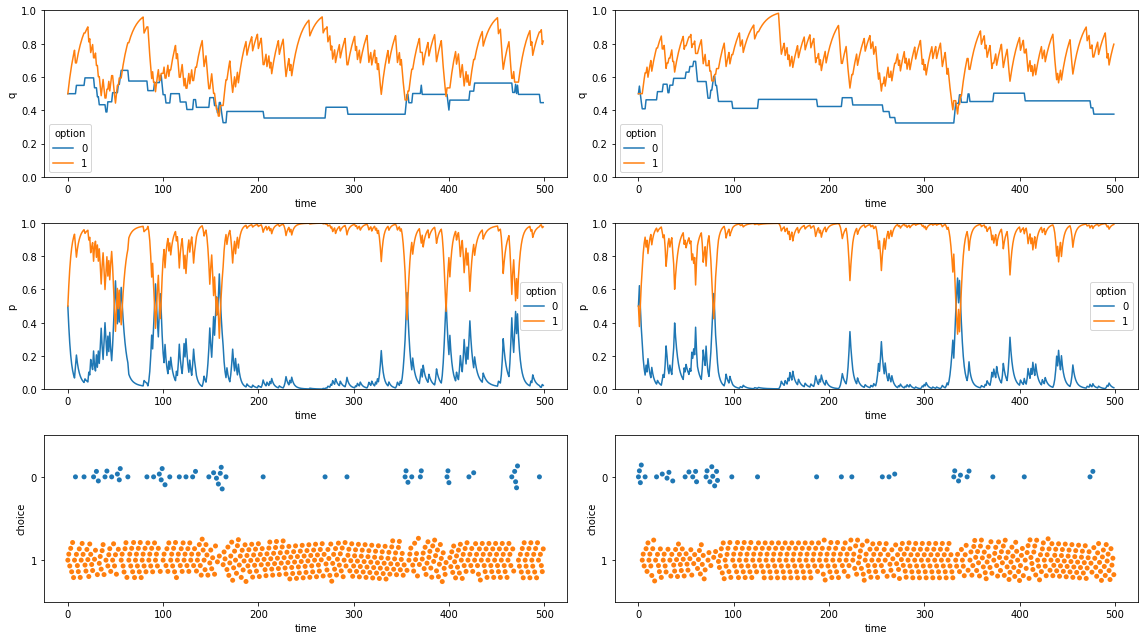

In [175]:
# Plot
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 9))

for i, (bhv, lv) in enumerate(((bhv_data_single, lv_data_single), 
                               (bhv_data_single_bf, lv_data_single_bf))):

    sns.lineplot(data=lv, x="time", y="q", hue="option", ax=axes[0, i])
    sns.lineplot(data=lv, x="time", y="p", hue="option", ax=axes[1, i])

    for ax in axes[:2, i]:
        ax.set_ylim(0, 1)

    sns.swarmplot(data=bhv, x='time', y='choice', orient="h", ax=axes[2, i])

plt.tight_layout()
plt.show()

### 3.4 Explore the behavior of the likelihood function over the parameter space
<a href="#Course-Overview">Course Overview</a>

<div class="alert alert-block alert-info">
<h4><img src="img/goal.png" width="20" align="left">&nbsp;Goal</h4>
    <ul>
        <li>Observe the behavior of your likelihood function over the parameter space;
        <li>Notify the local minima.
    </ul>
</div>

<img src="img/how_to.png" width="20" align="left">&nbsp;<b>How to do it?</b>

* Represent the objective function values over the parameter space (phase diagram):

In [176]:
model = RW
grid_size = 20

"""
Compute likelihood for several combinations of parameters
(using grid exploration)
"""

assert hasattr(model, 'fit_bounds'), \
    f"{model.__name__} has not 'fit_bounds' attribute"

n_param = len(model.fit_bounds)

parameter_values = np.atleast_2d([
            np.linspace(
                *model.fit_bounds[i],
                grid_size) for i in range(n_param)])
print("parameter values", parameter_values)

parameter values [[ 0.          0.05263158  0.10526316  0.15789474  0.21052632  0.26315789
   0.31578947  0.36842105  0.42105263  0.47368421  0.52631579  0.57894737
   0.63157895  0.68421053  0.73684211  0.78947368  0.84210526  0.89473684
   0.94736842  1.        ]
 [ 1.          2.          3.          4.          5.          6.
   7.          8.          9.         10.         11.         12.
  13.         14.         15.         16.         17.         18.
  19.         20.        ]]


In [177]:
# Create a grid for each parameter
param_grid = np.asarray(list(product(*parameter_values)))

n_sets = len(param_grid)

# Container for log-likelihood
ll = np.zeros(n_sets)

print("Computing data for parameter space exploration...")
# Loop over each value of the parameter grid for both parameters
for i in tqdm(range(n_sets), file=sys.stdout):

    # Select the parameter to use
    param_to_use = param_grid[i]

    # Call the objective function of the optimizer
    ll[i] = log_likelihood(
        data=bhv_data_single,  # THIS IS SPECIFIC
        model=RW,              # THIS IS SPECIFIC
        param=param_to_use)

Computing data for parameter space exploration...
100%|██████████| 400/400 [00:08<00:00, 46.22it/s]


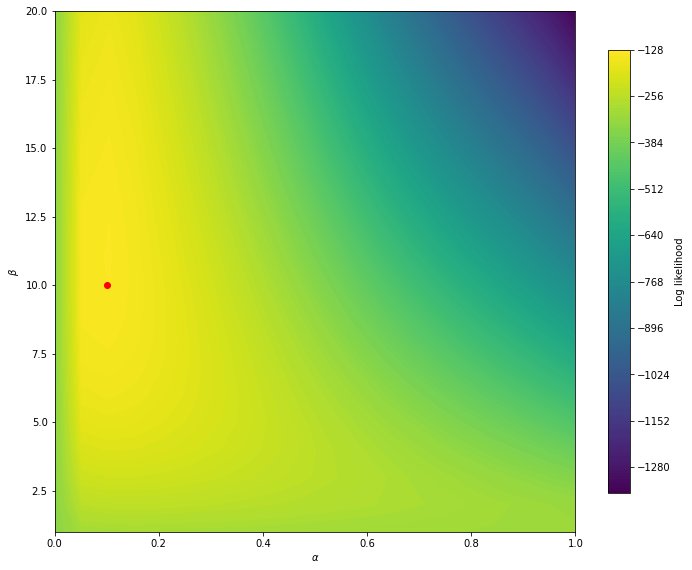

In [178]:
# Extract from data...
n_param, grid_size = parameter_values.shape
assert n_param == 2, \
    'This figure is made for models with exactly 2 parameters!'

x, y = parameter_values
z = ll.reshape((grid_size, grid_size)).T

# Create figures
fig, ax = plt.subplots(figsize=(10, 10))

# Axes labels
ax.set_xlabel(r"$\alpha$")
ax.set_ylabel(r"$\beta$")

# Get coordinates
x_coordinates, y_coordinates = np.meshgrid(x, y)

# Draw phase diagram
c = ax.contourf(x_coordinates, y_coordinates, z,
                levels=200, cmap='viridis')

ax.scatter(*PARAM_SINGLE, color='red')

# Make it look square
ax.set_aspect(1.0 / ax.get_data_ratio())

c_bar = fig.colorbar(c, ax=ax, aspect=20, shrink=0.635)
c_bar.ax.set_ylabel('Log likelihood')

plt.tight_layout()
plt.show()

<div class="alert alert-block alert-danger">
<h2><img src="img/warning.png" width="20" align="left">&nbsp;Warning</h2>
    <br>This solution only works if your model has two parameters. For a model having only one parameter, you can represent it by a single curve of the log-likelihood against the parameter value (you can refer to the <a href="#S2.-Parameter-space-exploration" class="alert-link">supplementary</a> for that). For more than two parameters, things get more complicated: you can still do one plot per parameter as shown in the <a href="#S2.-Parameter-space-exploration" class="alert-link">supplementary</a> for the present case, but the interpretation is not always easy.</div>

### 3.5 Try with a homogeneous population
<a href="#Course-Overview">Course Overview</a>

<div class="alert alert-block alert-info">
<h4><img src="img/goal.png" width="20" align="left">&nbsp;Goal</h4>
    <ul>
        <li>Generalize what you observe with a single subject to a homogeneous population.
    </ul>
    <br>
    <br><i>Note: At this stage, you will just rely on an intuitive appreciation. A systematized approach is provided at <a href="#3.6-Systematize-the-process" >the end of this section</a>.</i>
</div>

<img src="img/how_to.png" width="20" align="left">&nbsp;<b>How to do it?</b>

- Maintain constant the parameters that you are using (except the seed of your pseudo-random number generator):

In [179]:
# Define as parameter the best-fit parameter for the single agent
PARAM_HOM_POP_BF = [best_param for _ in range(N_SUBJECTS)]

# Get behavior for best-fit
bhv_hom_pop_bf = \
    run_sim_pop(model=RW, param=PARAM_HOM_POP_BF, n_subjects=N_SUBJECTS, 
                seed=np.arange(N_SUBJECTS, N_SUBJECTS+N_SUBJECTS))

# Get latent variables values
lv_hom_pop_bf = \
    latent_variables_rw_pop(bhv_data_pop=bhv_hom_pop_bf,
                            param=PARAM_HOM_POP_BF)

Running simulation for 30 agents...
100%|██████████| 30/30 [00:01<00:00, 23.88it/s]


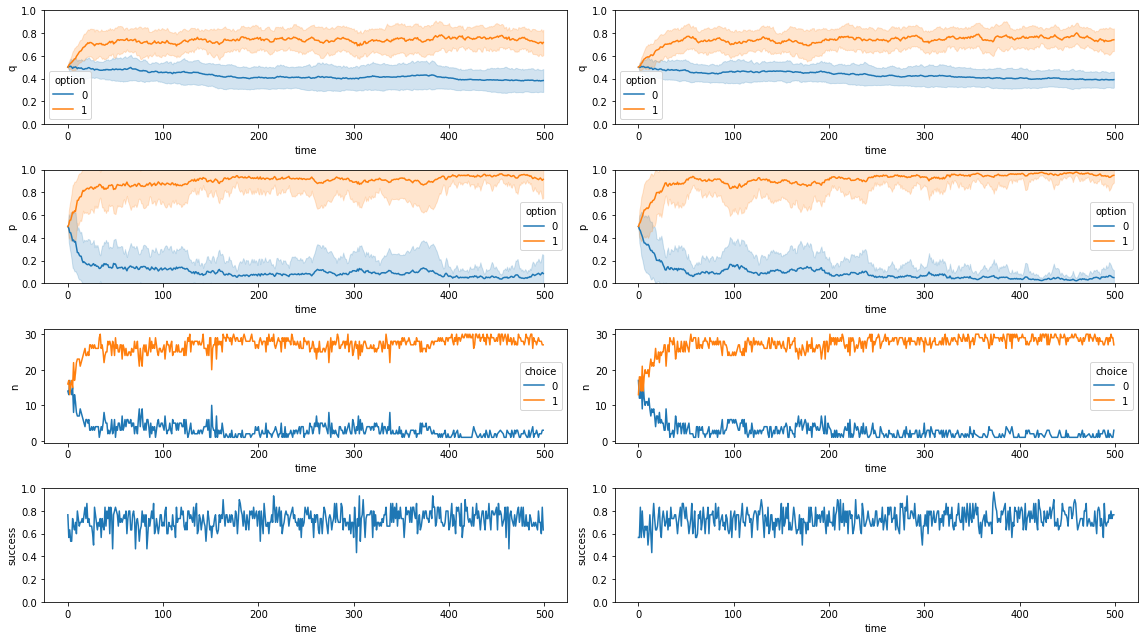

In [180]:
# Plot
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16, 9))

for i, (bhv, lv) in enumerate(((bhv_hom_pop, lv_hom_pop), 
                               (bhv_hom_pop_bf, lv_hom_pop_bf))):

    sns.lineplot(data=lv, x="time", y="q", hue="option", ax=axes[0, i], ci="sd")
    sns.lineplot(data=lv, x="time", y="p", hue="option", ax=axes[1, i], ci="sd")

    for ax in axes[:2, i]:
        ax.set_ylim(0, 1)
        
    rep_choice = bhv.groupby(['time', 'choice']).size().to_frame('n').reset_index()
    sns.lineplot(data=rep_choice, x="time", y="n", hue="choice", ax=axes[2, i])

    sns.lineplot(data=bhv, x="time", y="success", ax=axes[3, i], ci=None)
    axes[3, i].set_ylim(0, 1)


plt.tight_layout()
plt.show()

### 3.6 Systematize the process
<a href="#Course-Overview">Course Overview</a>

<div class="alert alert-block alert-info">
<h4><img src="img/goal.png" width="20" align="left">&nbsp;Goal</h4>
    <ul>
        <li>Test that you are able to retrieve close enough parameters for a large (enough) set of parameters;
        <li>Have a metric of the quality of your parameter recovery (Pearson's r), including statistical assessment of the relevancy.
    </ul>
</div>

<img src="img/how_to.png" width="20" align="left">&nbsp;<b>How to do it?</b>

* Represent the parameters used to simulate against the parameters recovered:

In [181]:
model=RW 
n_sets=30 

seed=234

print("Computing data for parameter recovery...")

# Seed the random number generator
np.random.seed(seed)

# Get the parameters labels
param_labels = model.param_labels
n_param = len(param_labels)

# Data container (2: simulated, retrieved)
row_list = []

# Loop over the number of parameter sets
for set_idx in tqdm(range(n_sets), file=sys.stdout):

    # Select parameter to simulate...
    param_to_sim = \
        [np.random.uniform(*b)
         for b in model.fit_bounds]

    # Simulate
    d = run_simulation(seed=set_idx, agent_model=model, param=param_to_sim)

    # Optimize
    best_param, best_value = optimize(model=model, data=d)

    # Backup
    for i in range(n_param):
        row_list.append({
            "Parameter": model.param_labels[i],
            "Used to simulate": param_to_sim[i],
            "Recovered": best_param[i]})
    
df = pd.DataFrame(row_list)
df.to_csv("likelihood_explo.csv", index=False)

Computing data for parameter recovery...
100%|██████████| 30/30 [00:28<00:00,  1.05it/s]


In [356]:
df = pd.read_csv("likelihood_explo.csv")
display(df.head())

,Parameter,Used to simulate,Recovered
0,$\alpha$,0.030967,0.019265
1,$\beta$,5.831359,6.584773
2,$\alpha$,0.592880,0.794114
3,$\beta$,1.191210,1.101175
4,$\alpha$,0.325810,0.335637


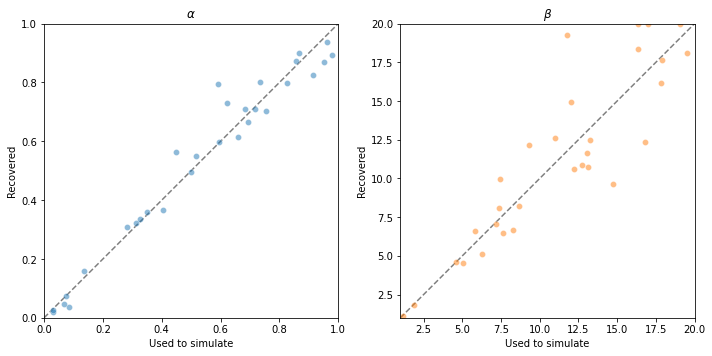

In [183]:
# Plot
param_names=RW.param_labels
param_bounds=RW.fit_bounds
n_param = len(param_names)

# Define colors
colors = [f'C{i}' for i in range(n_param)]

# Create fig and axes
fig, axes = plt.subplots(ncols=n_param,
                         figsize=(10, 9))

for i in range(n_param):

    # Select ax
    ax = axes[i]
    
    # Get param name
    p_name = param_names[i]
    
    # Set title
    ax.set_title(p_name)

    # Create scatter
    sns.scatterplot(data=df[df.Parameter == p_name], 
                    x="Used to simulate", y="Recovered", 
                    alpha=0.5, color=colors[i], 
                    ax=ax)

    # Set axis label
    ax.set_xlabel('Used to simulate')
    ax.set_ylabel('Recovered')

    # Plot identity function
    ax.plot(param_bounds[i], param_bounds[i], 
            linestyle="--", alpha=0.5, color="black", zorder=-10)
    
    ax.set_xlim(*param_bounds[i])
    ax.set_ylim(*param_bounds[i])

    # Square aspect
    ax.set_aspect(1)

plt.tight_layout()
plt.show()

---

* Compute the Pearson's coefficient for each model parameter, and assess the stastistical relevance:

In [184]:
# Stats
threshold = 0.05

for p_name in param_names:

    x = df[df.Parameter == p_name]["Used to simulate"]
    y = df[df.Parameter == p_name]["Recovered"]

    cor, p = scipy.stats.pearsonr(x, y)
    pf = f'={p:.3f}' if p >= 0.001 else '<0.001'
    pf += " *" if p <= threshold else " NS"
    print(f"[{p_name}] cor={cor:.3f}, p{pf}")

[$\alpha$] cor=0.980, p<0.001 *
[$\beta$] cor=0.895, p<0.001 *



## 4. Model Comparison &amp; Model Recovery
<a href="#Course-Overview">Course Overview</a>

<img src="img/competition.png" width="500">


<div class="alert alert-block alert-danger">
<h3><img src="img/warning.png" width="20" align="left">&nbsp;Warning</h3>
    <br>You should operate the process for parameter recovery (as described in <a class="alert-link" href="#3.-Parameter-Fitting-&amp;-Parameter-Recovery">Section 3</a>) for <strong>all</strong> the models in competition before proceeding to model comparison &amp; model recovery.</div>
    
<div class="alert alert-block alert-success">
<h3><img src="img/goal.png" width="20" align="left">&nbsp;Section Goal</h3>
<ul><li>Be able to compare your models
    <li>Ensure that each model, when used for simulating, is selected as the best model (i.e. you are able to recover the 'true' model).</ul>
</div>

### 4.1 Choose a metric
<a href="#Course-Overview">Course Overview</a>

<div class="alert alert-block alert-info">
<h4><img src="img/goal.png" width="20" align="left">&nbsp;Goal</h4>
    <ul>
        <li>Choose a metric to compare your models.
    </ul>
</div>

<img src="img/how_to.png" width="20" align="left">&nbsp;<b>How to do it?</b>

* Before all, define your model space. Here, we will compare:
    * Random selection
    * Win-Stay-Lose-Switch
    * Rescola-Wagner
    * Rescola-Wagner-Choice-Kernel

In [372]:
MODELS = Random, WSLS, RW, RWCK
MODEL_NAMES = [m.__name__ for m in MODELS]

* Then choose a metric to compare your models. Here, we will use the Bayesian Information Criterion (BIC):
\begin{equation}
\text{BIC} = - 2 \log p(D\mid {\widehat {\theta }},M) + k \log(T)
\end{equation}

*Note: The lowest the BIC score is, the better it is.*

In [373]:
def bic(ll, k, n_iteration):
    return -2 * ll + k * np.log(n_iteration)

---

* Write a function that allows you, based on a list of choices and successes, to compute the metric for each model:

In [374]:
def optimize_and_compare_single(bhv_data):
    
    n_models = len(MODELS)
    bic_scores = np.zeros(n_models)
    lls = np.zeros(n_models)
    best_params = []

    for j in range(n_models):

        # Select the model
        model_to_fit = MODELS[j]

        # Optmize
        best_param, best_value = optimize(data=bhv_data, model=model_to_fit)

        # Get log-likelihood for best param
        ll = -best_value

        # Compute the bit score
        bs = bic(ll, k=len(model_to_fit.fit_bounds), n_iteration=T)

        # Backup
        bic_scores[j] = bs
        lls[j] = ll
        best_params.append(best_param)

    return best_params, lls, bic_scores

### 4.2 Try with a single agent
<a href="#Course-Overview">Course Overview</a>

<div class="alert alert-block alert-danger">
<h3><img src="img/warning.png" width="20" align="left">&nbsp;Warning</h3>
<br>
    You should operate this process for <b>all</b> the models in competition (not only for one, even if you think it is the best one).</div>
   
<div class="alert alert-block alert-info">
<h4><img src="img/goal.png" width="20" align="left">&nbsp;Goal</h4>
    <ul>
        <li>Check that everything is going fine in the most simple case.
    </ul>
</div>

<img src="img/how_to.png" width="20" align="left">&nbsp;<b>How to do it?</b>

In [375]:
# Compute bic scores for evey model for our initial set of data
best_params, lls, bic_scores = \
        optimize_and_compare_single(bhv_data=bhv_data_single)

print(f"Model used: {MODEL_XP.__name__}")
print("-" * 10)

for i in range(len(MODELS)):
    print(f"BIC {MODELS[i].__name__}".ljust(14) + f"{bic_scores[i]:.3f}")

print()

Model used: RW
----------
BIC Random    693.147
BIC WSLS      598.003
BIC RW        281.243
BIC RWCK      293.606



### 4.3 Systematize the approach
<a href="#Course-Overview">Course Overview</a>

<div class="alert alert-block alert-info">
<h4><img src="img/goal.png" width="20" align="left">&nbsp;Goal</h4>
    <ul>
        <li>Test that you can generalize what you observed with one single individual;
        <li>Have a metric of the quality of your model recovery.
    </ul>
</div>

<img src="img/how_to.png" width="20" align="left">&nbsp;<b>How to do it?</b>

* Draw a confusion matrix:

In [190]:
# Seed the random number generator
np.random.seed(123)

# Select how many simualtions per model
n_sets = 10

# Select which models to use
models = MODELS

print("Computing data for confusion matrix...")

# Number of models
n_models = len(models)

# Data container
confusion_matrix = np.zeros((n_models, n_models))

# Loop over each model
with tqdm(total=n_models*n_sets, file=sys.stdout) as pbar:
    for i in range(n_models):

        # Select the model
        model_to_sim = models[i]

        for j in range(n_sets):

            # Select parameters to simulate
            param_to_sim = \
                [np.random.uniform(*b)
                 for b in model_to_sim.fit_bounds]

            # Simulate
            d = run_simulation(seed=j, agent_model=model_to_sim, param=param_to_sim)

            # Compute bic scores
            best_params, lls, bic_scores = optimize_and_compare_single(d)

            # Get minimum value for bic (min => best)
            min_ = np.min(bic_scores)

            # Get index of models that get best bic
            idx_min = np.arange(n_models)[bic_scores == min_]

            # Add result in matrix
            confusion_matrix[i, idx_min] += 1/len(idx_min)

            # Update progress bar
            pbar.update(1)

# Get the model names
model_names = [m.__name__ for m in models]

# Save as a dataframe
df_cm = pd.DataFrame(confusion_matrix, 
                     index=model_names,
                     columns=model_names)
df_cm.to_csv("confusion_matrix.csv")

Computing data for confusion matrix...
100%|██████████| 40/40 [03:25<00:00,  5.13s/it]


In [364]:
# Load the dataframe
df_cm = pd.read_csv("confusion_matrix.csv", index_col=[0])

# Print...
display(df_cm)

,Random,WSLS,RW,RWCK
Random,10.0,0.0,0.0,0.0
WSLS,1.0,9.0,0.0,0.0
RW,0.0,0.0,10.0,0.0
RWCK,0.0,0.0,1.0,9.0


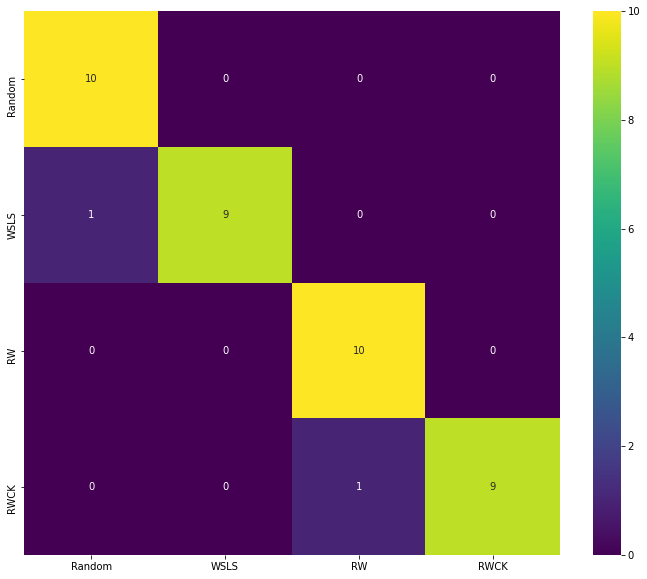

In [365]:
# Create figure and axes
fig, ax = plt.subplots(figsize=(12, 10))

# Display the results using a heatmap
sns.heatmap(data=df_cm, cmap='viridis', annot=True, ax=ax)

plt.show()

<img src="img/precision_recall.jpeg" width="700">

* Compute adequate statistics to know the robustness of your observations

In [377]:
# For each model...
for m in model_names:
    
    # Get the number of true positive
    k = df_cm.at[m, m]
    
    # Get the number of true positive plus false positive
    n = np.sum(df_cm[m])
    
    # Compute the precisoin
    precision = k/n
    
    # Compute the confidence intervals
    ci_pres_low, ci_pres_upp = statsmodels.stats.proportion.proportion_confint(k, n)
    
    # Get the number of true positive plus false negative
    n = np.sum(df_cm.loc[m])
    
    # Compute the recall
    recall = k/n
    
    # Compute the confidence interval
    ci_recall_low, ci_recall_upp = statsmodels.stats.proportion.proportion_confint(count=k, nobs=n)
    
    # Compute the f score
    f_score = 2*(precision* recall)/(precision+recall)
    
    # Print the results
    print(m)
    print("-" * 10)
    print("Precision:".ljust(12) + f"{precision:.3f} [{ci_pres_low:.3f}, {ci_pres_upp:.3f}]")
    print("Recall:".ljust(12) +  f"{recall:.3f} [{ci_recall_low:.3f}, {ci_recall_upp:.3f}]")
    print("F1 score:".ljust(12) + f"{f_score:.3f}")
    print()

Random
----------
Precision:  0.909 [0.739, 1.000]
Recall:     1.000 [1.000, 1.000]
F1 score:   0.952

WSLS
----------
Precision:  1.000 [1.000, 1.000]
Recall:     0.900 [0.714, 1.000]
F1 score:   0.947

RW
----------
Precision:  0.909 [0.739, 1.000]
Recall:     1.000 [1.000, 1.000]
F1 score:   0.952

RWCK
----------
Precision:  1.000 [1.000, 1.000]
Recall:     0.900 [0.714, 1.000]
F1 score:   0.947



Note: Confidence intervals are <a href="https://en.wikipedia.org/wiki/Binomial_proportion_confidence_interval"> binomial confidence intervals</a>.

## 5. Artificial Experiment
<a href="#Course-Overview">Course Overview</a>

<img src="img/experiment.jpg" width="150">

<div class="alert alert-block alert-danger">
<h3><img src="img/warning.png" width="20" align="left">&nbsp;Warning</h3>
    <ul>
        <li>You should operate the process for model recovery (as described in <a class="alert-link" href="#4.-Model-Comparison-&amp;-Model-Recovery">Section 4</a>) for <strong>all</strong> the models in competition before 'faking' actual experiments.
        <li> You should conduct 'fake' experiments with <strong>all</strong> the models in competition, even if here, we will conduct an experiment only with the Rescorla-Wagner model. 
    </ul>
</div>



<div class="alert alert-block alert-success">
<h3><img src="img/goal.png" width="20" align="left">&nbsp;Section Goal</h3>
    <ul>
    <li>Have an overview about what the results of your experiment could look like, under the assumption that you get the best model, but it exists small variations in the population in terms of parametrization;
    <li> Be sure that you can retrieve the model in this context;
    <li> Have an idea about the distribution of your metrics regarding model selection (log-likelihood sums, BIC);
    <li> More generally, it is your last resort before the actual experiment (user study) to avoid bad surprises!
    </ul>
</div>

### 5.1 Generate data
<a href="#Course-Overview">Course Overview</a>

<div class="alert alert-block alert-info">
<h4><img src="img/goal.png" width="20" align="left">&nbsp;Goal</h4>
    <ul>
        <li>Generate data with a population of (relatively enough) heterogenous agents.
    </ul>
</div>

<img src="img/how_to.png" width="20" align="left">&nbsp;<b>How to do it?</b>

* Generate parameters

In [359]:
# Seed the pseudo-random number generator
np.random.seed(1234)

# Select the model to use
model = MODEL_XP

# Let's assume a normal distribution of the parameters in the population
dist_param=[(0.1, 0.05), (10.0, 0.5)]

# Retrieve the number of parameters
n_param = len(model.fit_bounds)

# Container for the results
param = np.zeros((N_SUBJECTS, n_param))

# For each parameter...
for i in range(n_param):
    
    # Generate values
    dp = np.random.normal(*dist_param[i], size=N_SUBJECTS)

    # Ensure that no value is outside of the bounds
    inf_bound, sup_bound = model.fit_bounds[i]
    dp[dp<inf_bound] = inf_bound
    dp[dp>sup_bound] = sup_bound
    
    # Store the result
    param[:, i] = dp
    
# Print...
print(param)

[[1.23571758e-01 9.80107989e+00]
 [4.04512153e-02 1.01687188e+01]
 [1.71635348e-01 1.05237893e+01]
 [8.43674052e-02 1.05229691e+01]
 [6.39705633e-02 1.04318586e+01]
 [1.44358147e-01 9.93895421e+00]
 [1.42979421e-01 1.00623565e+01]
 [6.81738248e-02 9.83860260e+00]
 [1.00784819e-01 1.04208374e+01]
 [0.00000000e+00 1.11954803e+01]
 [1.57501786e-01 1.00380998e+01]
 [1.49597301e-01 9.71677703e+00]
 [1.47666206e-01 1.00180710e+01]
 [0.00000000e+00 8.96251120e+00]
 [8.32961317e-02 1.01238961e+01]
 [1.00105918e-01 9.55142161e+00]
 [1.20272671e-01 9.93160258e+00]
 [1.14454597e-01 1.00091446e+01]
 [1.66057910e-01 1.03777070e+01]
 [2.26547223e-02 1.01076343e+01]
 [8.98676838e-02 1.04205044e+01]
 [6.72015328e-02 9.27709496e+00]
 [1.09671069e-01 9.29901336e+00]
 [1.27671946e-01 9.94954090e+00]
 [1.65907578e-01 9.72587878e+00]
 [7.65347358e-02 9.92769025e+00]
 [1.33777704e-01 1.01770102e+01]
 [9.14863867e-03 9.98224349e+00]
 [9.08445730e-02 1.02828692e+01]
 [1.52948459e-01 1.07728294e+01]]


* Run the simulation

In [363]:
# Get the behavioral data ans save it
bhv_het_pop = run_sim_pop(model=model, n_subjects=N_SUBJECTS, param=param, 
                          seed=np.arange(N_SUBJECTS))
bhv_het_pop.to_csv("bhv_het_pop.csv")

# Print
display(bhv_het_pop)

Running simulation for 30 agents...
100%|██████████| 30/30 [00:01<00:00, 20.59it/s]


,choice,success,time,id
0,1,True,0,0
1,1,True,1,0
2,1,True,2,0
3,1,True,3,0
4,1,True,4,0
...,...,...,...,...
495,1,False,495,29
496,1,True,496,29
497,1,True,497,29
498,1,True,498,29


* Display the results

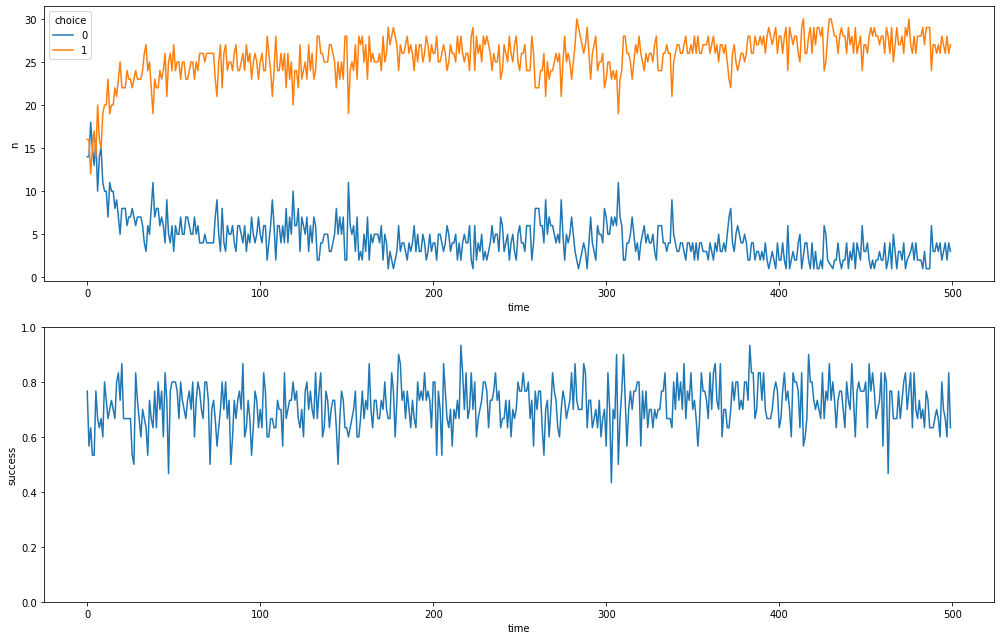

In [361]:
# Create figure and axes
fig, axes = plt.subplots(nrows=2, figsize=(14, 9))

# Plot the choices
rep_choice = bhv_het_pop.groupby(['time', 'choice']).size().to_frame('n').reset_index()
sns.lineplot(data=rep_choice, x="time", y="n", hue="choice", ax=axes[0])

# Plot the success
sns.lineplot(data=bhv_het_pop, x="time", y="success", ax=axes[1], ci=None)

# Set the limits of the y-axis
axes[1].set_ylim(0, 1)

plt.tight_layout()
plt.show()

### 5.2 Compare the models
<a href="#Course-Overview">Course Overview</a>

<div class="alert alert-block alert-info">
<h4><img src="img/goal.png" width="20" align="left">&nbsp;Goal</h4>
    <ul>
        <li> Being sure that in the 'true' context of the experiment, you are able to retrieve the 'best' model.
    </ul>
</div>

<img src="img/how_to.png" width="20" align="left">&nbsp;<b>How to do it?</b>

* Compute the LLS and the BIC score for each subject

In [255]:
# Create a list 
row_list = []

# Loop over subjects
for id_, bhv in tqdm(bhv_het_pop.groupby("id"), file=sys.stdout):

    # For each model we wish to compare
    for m in MODELS:

        # Optmize
        best_param, best_value = optimize(data=bhv, model=m)

        # Get log-likelihood for best param
        ll = -best_value

        # Compute the bit score
        bs = bic(ll, k=len(m.fit_bounds), n_iteration=T)
        
        # Change type of best param for easier retrieval afterwards
        best_param = best_param.tolist() if isinstance(best_param, np.ndarray) else best_param
        
        # Add to the row list
        row_list.append({
            "id": id_,
            "BIC": bs,
            "LLS": ll,
            "model": m.__name__,
            "best-param": best_param})

# Create dataframe and save it
model_comp = pd.DataFrame(row_list)
model_comp.to_csv("model_comp.csv", index=False)


100%|██████████| 30/30 [04:04<00:00,  8.17s/it]


In [323]:
# Load the results
model_comp = pd.read_csv("model_comp.csv", converters={'best-param': eval})

# Print...
display(model_comp)

,id,BIC,LLS,model,best-param
0,0,693.147181,-346.573590,Random,[]
1,0,586.221318,-290.003355,WSLS,[0.533066126716141]
2,0,258.950184,-123.260484,RW,"[0.1148139013284631, 10.002824355887036]"
3,0,271.212734,-123.177151,RWCK,"[0.1202466945069815, 9.566449761525137, 3.0639..."
4,1,693.147181,-346.573590,Random,[]
...,...,...,...,...,...
115,28,409.815775,-192.478671,RWCK,"[0.13262311520373285, 6.8695579263364985, 0.07..."
116,29,693.147181,-346.573590,Random,[]
117,29,592.203199,-292.994296,WSLS,[0.5450901798038846]
118,29,299.037583,-143.304183,RW,"[0.18891798172954422, 9.648259367487105]"


* Plot the distributions of the likelihoods

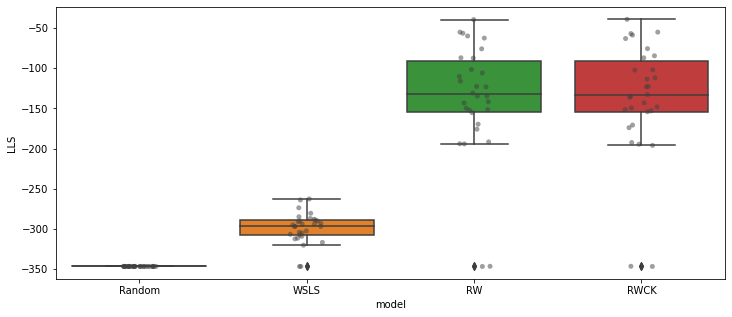

In [326]:
# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 5))

# Create the boxplots
sns.boxplot(data=model_comp, x="model", y="LLS", ax=ax)

# Add the individual data points
sns.stripplot(data=model_comp, x="model", y="LLS", ax=ax, color=".25", alpha=0.5)

plt.show()

* Compute the frequency with which each model is the most likely

In [327]:
models = model_comp["model"].unique()
counts = {m: 0 for m in models}

for i, (_, df) in enumerate(model_comp.groupby("id")):
    
    idx_max = df[['LLS']].idxmax()
    best_m = df.loc[idx_max, "model"].item()
    counts[best_m] += 1

n = model_comp["id"].unique().size

freq = {m: counts[m]/n for m in models}
ci = {m:  list(statsmodels.stats.proportion.proportion_confint(count=counts[m], nobs=n)) for m in models}
y_err = {m: list(np.abs(np.subtract(ci[m], freq[m]))) for m in models}

Note: Confidence intervals are <a href="https://en.wikipedia.org/wiki/Binomial_proportion_confidence_interval"> binomial confidence intervals</a>.

In [328]:
df = pd.DataFrame({"ci": ci, "y_err": y_err, "freq": freq, "counts": counts})
df

,ci,y_err,freq,counts
Random,"[0.0, 0.0]","[0.0, 0.0]",0.000000,0
WSLS,"[0.0, 0.0]","[0.0, 0.0]",0.000000,0
RW,"[0.35481196042101387, 0.7118547062456528]","[0.17852137291231945, 0.1785213729123195]",0.533333,16
RWCK,"[0.2881452937543472, 0.6451880395789862]","[0.17852137291231945, 0.1785213729123195]",0.466667,14


and your  model comparison metric for each model, as well as the frequency with which each model is the most likely and the 'best' based on your metric:

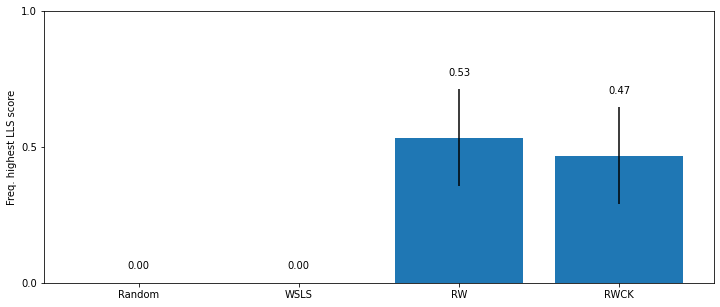

In [318]:
# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 5))

# Set the ticks positions and labels
x_pos = np.arange(len(df.index))
ax.set_xticks(x_pos)
ax.set_xticklabels(df.index)

freq = df["freq"].values
y_err = np.array(df["y_err"].values.tolist()).T

# Plot the bar
ax.bar(x_pos, freq, yerr=y_err)

# Add label indicating the frequence on top of each bar
for i in range(len(freq)):

    ax.text(x=i, y=freq[i]+y_err[1, i]+0.05,
            s=f'{freq[i]:.2f}', size=10,
            horizontalalignment='center')

# Set the label of the y-axis
ax.set_ylabel("Freq. highest LLS score")

ax.set_ylim(0, 1)

plt.show()

* Plot the distribution of the metric used to compare the models (here the BIC score)

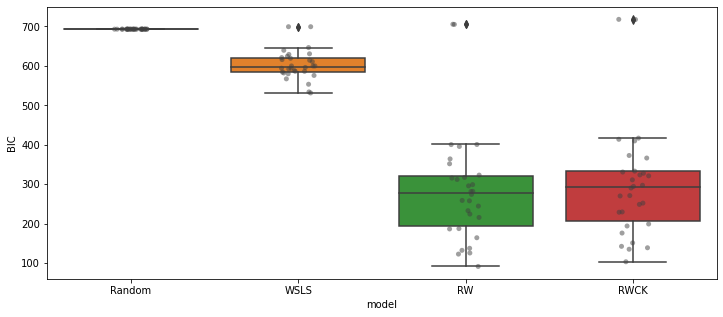

In [329]:
# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 5))

# Create the boxplots
sns.boxplot(data=model_comp, x="model", y="BIC", ax=ax)

# Add the individual data points
sns.stripplot(data=model_comp, x="model", y="BIC", ax=ax, color=".25", alpha=0.5)

plt.show()

* Compute the frequency with which each model is the 'best' according to a metric (here the BIC score)

In [379]:
# Retrieve the model list
models = model_comp["model"].unique()

# Containter for the counts
counts = {m: 0 for m in models}

# For each subject data...
for i, (_, df) in enumerate(model_comp.groupby("id")):
    
    # Get where the BIC is the lower
    idx_min = df[['BIC']].idxmin()
    
    # Retrieve the model name
    best_m = df.loc[idx_min, "model"].item()
    
    # Add one
    counts[best_m] += 1

# Retrieve the number of subjects
n = model_comp["id"].unique().size

# Compute frequencies, confidence intervals and compute values that will be used for the error bars
freq = {m: counts[m]/n for m in models}
ci = {m:  list(statsmodels.stats.proportion.proportion_confint(count=counts[m], nobs=n)) for m in models}
y_err = {m: list(np.abs(np.subtract(ci[m], freq[m]))) for m in models}

# Store the results in a dataframe
df = pd.DataFrame({"ci": ci, "y_err": y_err, "freq": freq, "counts": counts})
display(df)

,ci,y_err,freq,counts
Random,"[0.0, 0.1559273531228264]","[0.06666666666666667, 0.08926068645615974]",0.066667,2
WSLS,"[0.0, 0.0]","[0.0, 0.0]",0.000000,0
RW,"[0.8440726468771736, 1.0]","[0.0892606864561597, 0.06666666666666665]",0.933333,28
RWCK,"[0.0, 0.0]","[0.0, 0.0]",0.000000,0


Note: Confidence intervals are <a href="https://en.wikipedia.org/wiki/Binomial_proportion_confidence_interval"> binomial confidence intervals</a>.

* Represent the result

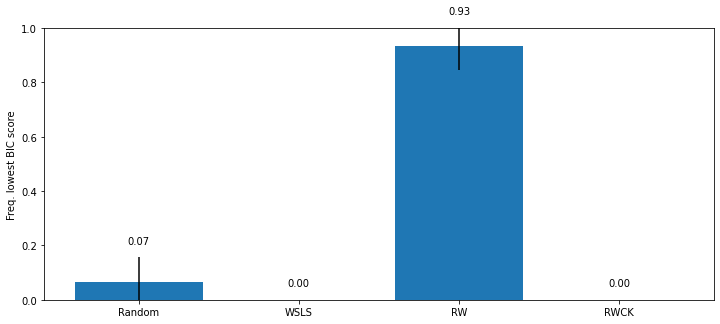

In [380]:
# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 5))

# Get the ticks
x_pos = np.arange(len(df.index))
ax.set_xticks(x_pos)
ax.set_xticklabels(df.index)

# Get frequencies and error bars
freq = df["freq"].values
y_err = np.array(df["y_err"].values.tolist()).T

# Plot the bars
ax.bar(x_pos, freq, yerr=y_err)

# Add label indicating the frequence on top of each bar
for i in range(len(freq)):

    ax.text(x=i, y=freq[i]+y_err[1, i]+0.05,
            s=f'{freq[i]:.2f}', size=10,
            horizontalalignment='center')

# Set the label of the y-axis
ax.set_ylabel("Freq. lowest BIC score")

# Set the y-limits
ax.set_ylim(0, 1)

plt.show()

* Is the model that you used to simulate selected as the best model?

### 5.3 Study the distribution of your best-fit parameters
<a href="#Course-Overview">Course Overview</a>

<div class="alert alert-block alert-info">
<h4><img src="img/goal.png" width="20" align="left">&nbsp;Goal</h4>
    <ul>
        <li>Have an insight about how your distribution of best-fit parameters should look like.
    </ul>
</div>

<img src="img/how_to.png" width="20" align="left">&nbsp;<b>How to do it?</b>

* Plot the distribution of your best-fit parameters:

In [334]:
# Extract from the data the best-fit parameters
bp = model_comp[model_comp["model"] == "RW"]["best-param"]
bp_arr = np.array(bp.values.tolist())
bp_dic = {pr_name: bp_arr[:, i] for i, pr_name in enumerate(RW.param_labels)}

# Store them in a new dataframe
df_param = pd.DataFrame(bp_dic).melt(var_name="parameter")

# Print...
display(df_param)

,parameter,value
0,$\alpha$,0.114814
1,$\alpha$,0.021818
2,$\alpha$,0.172929
3,$\alpha$,0.059855
4,$\alpha$,0.064316


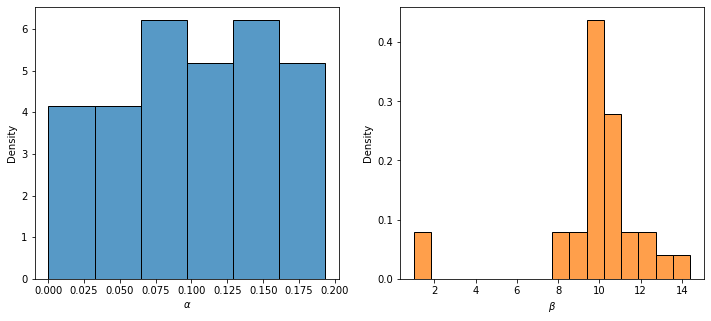

In [242]:
# Plot best parameters distribution
fig, axes = plt.subplots(figsize=(12, 5), ncols=2)
for i, (pr_name, df) in enumerate(df_param.groupby("parameter")):
    sns.histplot(data=df, x="value", ax=axes[i], color=f"C{i}", stat="density")
    axes[i].set_xlabel(pr_name)
plt.show()

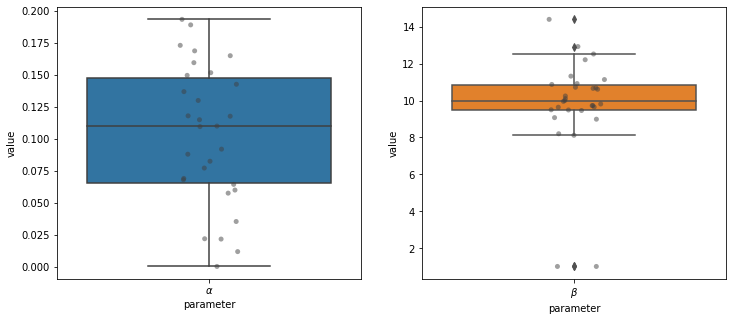

In [244]:
# Plot best parameters distribution
fig, axes = plt.subplots(figsize=(12, 5), ncols=2)

# For each paramter...
for i, (_, df) in enumerate(df_param.groupby("parameter")):
    
    # Do a boxplot
    sns.boxplot(data=df, x="parameter", y="value", ax=axes[i], color=f"C{i}")
    
    # Represent individual data points
    sns.stripplot(data=df, x="parameter", y="value", ax=axes[i], color=".25", alpha=0.5)

plt.show()

### 5.4 Simulate with the best-fit parameters
<a href="#Course-Overview">Course Overview</a>

<div class="alert alert-block alert-info">
<h4><img src="img/goal.png" width="20" align="left">&nbsp;Goal</h4>
    <ul>
        <li>Be sure that in the 'true' context of your experiment, you are able to reproduce the behavior.
    </ul>
</div>

<img src="img/how_to.png" width="20" align="left">&nbsp;<b>How to do it?</b>

In [382]:
# Get behavior for best-fit
bhv_het_pop_bf = run_sim_pop(model=RW, param=bp_arr, n_subjects=N_SUBJECTS, seed=np.arange(N_SUBJECTS))

# Get latent variables values
lv_het_pop_bf = latent_variables_rw_pop(bhv_het_pop_bf, param=bp_arr)

Running simulation for 30 agents...
100%|██████████| 30/30 [00:01<00:00, 23.97it/s]


NameError: name 'lv_het_pop' is not defined

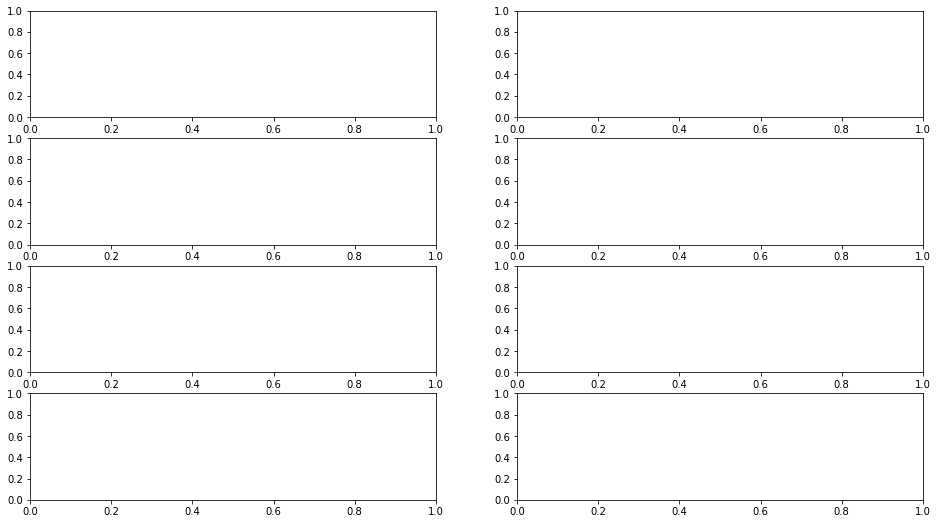

In [383]:
# Plot
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16, 9))

for i, (bhv, lv) in enumerate(((bhv_het_pop, lv_het_pop), 
                               (bhv_het_pop_bf, lv_het_pop_bf))):

    sns.lineplot(data=lv, x="time", y="q", hue="option", ax=axes[0, i], ci="sd")
    sns.lineplot(data=lv, x="time", y="p", hue="option", ax=axes[1, i], ci="sd")

    for ax in axes[:2, i]:
        ax.set_ylim(0, 1)
        
    rep_choice = bhv.groupby(['time', 'choice']).size().to_frame('n').reset_index()
    sns.lineplot(data=rep_choice, x="time", y="n", hue="choice", ax=axes[2, i])

    sns.lineplot(data=bhv, x="time", y="success", ax=axes[3, i], ci=None)
    axes[3, i].set_ylim(0, 1)


plt.tight_layout()
plt.show()

**What do do next?**

Experiment with living agents!

## Conclusive Remarks and a Few Take-Aways
<a href="#Course-Overview">Course Overview</a>


<img src="img/netflix.png" width="300">

<div class="alert alert-block alert-success">
<h2><img src="img/goal.png" width="20" align="left">&nbsp;Learning objectives</h2>
    <br>Learn by a basic example the elementary rules of decision making modeling, including:
    <ul>
        <li>How to design task and models (see <a href="#1.-Task-Model-&-Decision-Making-Models" class="alert-link">Section 1</a>);
        <li>How to conduct exploratory simulations and  (see <a href="#2.-Exploratory-Simulations" class="alert-link">Section 2</a>);
        <li>How to fit your models on experimental data and be confident that you can recover the best parameters (see <a href="#3.-Parameter-Fitting-&amp;-Parameter-Recovery" class="alert-link">Section 3</a>);
        <li>How to compare the quality of your models given data and be confident that you can recover the best model (see <a href="#4.-Model-Comparison-&amp;-Model-Recovery" class="alert-link">Section 4</a>);
        <li>How to simulate your experimental results in preparation of a 'real' experiment (see <a href="#5.-Artificial-Experiment" class="alert-link">Section 5</a>);
    </ul>
</div>


## Additional material
<a href="#Course-Overview">Course Overview</a>

### Parameter space exploration
<a href="#Course-Overview">Course Overview</a>

* Separate plot for each parameter

In [ ]:
model = RW
grid_size = 20

"""
Compute likelihood for several combinations of parameters
(using grid exploration)
"""

print("Computing data for parameter space exploration...")

assert hasattr(model, 'fit_bounds'), \
    f"{model.__name__} has not 'fit_bounds' attribute"

n_param = len(model.fit_bounds)

parameter_values = np.atleast_2d([
            np.linspace(
                *model.fit_bounds[i],
                grid_size) for i in range(n_param)])

# Create a grid for each parameter
param_grid = np.asarray(list(product(*parameter_values)))

n_sets = len(param_grid)

# Container for log-likelihood
ll = np.zeros(n_sets)

# Loop over each value of the parameter grid for both parameters
for i in tqdm(range(n_sets), file=sys.stdout):

    # Select the parameter to use
    param_to_use = param_grid[i]

    # Call the objective function of the optimizer
    ll[i] = log_likelihood(
        data=bhv_data_single,  # THIS IS SPECIFIC
        model=RW,              # THIS IS SPECIFIC
        param=param_to_use)

In [ ]:
# Separate plot for each parameter
param_names = RW.param_labels
true_params = PARAM_SINGLE

# Extract from data...
n_param, grid_size = parameter_values.shape
y = ll.reshape([grid_size for _ in range(n_param)])

# Create figures
fig, axes = plt.subplots(ncols=n_param, figsize=(12, 6))

for i in range(n_param):

    # Select relevant data
    ax = axes[i]
    param_name = param_names[i]
    x = parameter_values[i]

    # Compute mean and std
    axis = list(range(n_param))
    axis.remove(i)

    mean = np.mean(y, axis=tuple(axis))
    std = np.std(y, axis=tuple(axis))

    # Plot the mean
    ax.plot(x, mean)

    # Draw the area mean-STD, mean+STD
    ax.fill_between(
        x,
        mean - std,
        mean + std,
        alpha=0.2)

    ax.axvline(x=true_params[i], color='red')

    ax.set_xlabel(f"{param_name}")
    ax.set_ylabel("Likelihood")

plt.tight_layout()
plt.show()